# ABOUT:
- this notebook:
    - Evaluates the effectiveness of data augmentation (vs no augmentation) on Fi_ATSA 

# Findings:
- Easy Data Augmentation techniques do improve ATSA performance slightly and mitigates overfitting

In [1]:
# from SATSA_FinBERT import *
# import random
import os
import pandas as pd
import seaborn as sb

In [2]:
def filter_results(df, dataset_name = ["Fi_ATSA_train", "Fi_ATSA_test", "Fi_ATSA_eda"], mode = ['Train', "Validation"], epoch = None):
    df = df[df['dataset_name'].isin(dataset_name)]
    df = df[df['mode'].isin(mode)]
    if epoch:
        df = df[df['epoch']==epoch]
    return df

In [3]:
directory = r"C:\Users\tanch\Documents\NTU\URECA - Aspect Based Sentiment Analysis\URECA--Financial-Aspect-Based-Sentiment-Analysis\logs\csv_files"

In [4]:
data = pd.DataFrame()
for filename in os.listdir(directory):
    data = data.append(pd.read_csv(os.path.join(directory, filename)))
    

In [6]:
import matplotlib.pyplot as plt

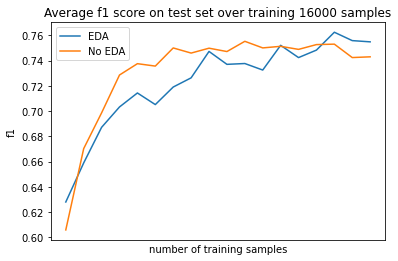

In [172]:
tmp = filter_results(data, mode = ["Test"], dataset_name = ['Fi_ATSA_eda'])
tmp["epoch"] = list(range(18))+list(range(18))+list(range(18))
tmp = tmp.groupby("epoch").mean()
sb.lineplot(data = tmp, x = "epoch", y = "epoch_f1")
tmp = filter_results(data, mode = ["Test"], dataset_name = ['Fi_ATSA_train'])
tmp["epoch"] = list(range(18))+list(range(18))+list(range(18))
tmp = tmp.groupby("epoch").mean()
sb.lineplot(data = tmp, x = "epoch", y = "epoch_f1").set(ylabel = "f1", xlabel = "number of training samples", 
                                                         title = "Average f1 score on test set over training 16000 samples")
plt.xticks([],[])
plt.legend(["EDA","No EDA"])

[Text(0.5, 1.0, 'Average f1 score on training set at 16000 training samples'),
 Text(0.5, 0, '')]

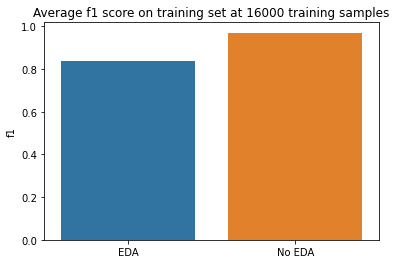

In [174]:
sb.barplot(data = pd.DataFrame({"mode":["EDA","No EDA"], "f1":[0.838206,0.97016]}), x = "mode", y = "f1", orient = "v").set(
    title = "Average f1 score on training set at 16000 training samples",
    xlabel = ""
)